## ABDULLAH ZUNORAIN

Matplotlib is building the font cache; this may take a moment.


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.2692 - loss: 1.9272 - val_accuracy: 0.5204 - val_loss: 1.3587
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.4986 - loss: 1.3992 - val_accuracy: 0.5794 - val_loss: 1.1895
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5637 - loss: 1.2293 - val_accuracy: 0.6229 - val_loss: 1.0676
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.5969 - loss: 1.1293 - val_accuracy: 0.6425 - val_loss: 1.0208
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6377 - loss: 1.0327 - val_accuracy: 0.6611 - val_loss: 0.9557
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.6569 - loss: 0.9724 - val_accuracy: 0.6682 - val_loss: 0.9391
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6818 - loss: 0.9155 - val_accuracy: 0.6715 - val_loss: 0.9383
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6972 - loss: 0.8619 - 

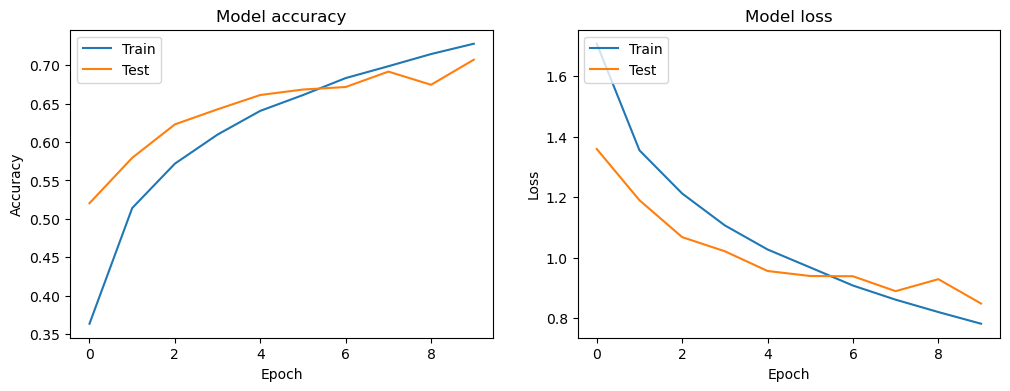

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the input
input_shape = Input(shape=(32, 32, 3))

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu')(input_shape)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# Flatten the output and add fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(10, activation='softmax')(x)  # 10 classes for CIFAR-10

# Create the model
model = Model(inputs=input_shape, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()